## Experiment 8

## Load flow studies with PyPower

In [1]:
import numpy as np
from pypower.api import case39, ppoption, runpf
import matplotlib.pyplot as plt

### Input

In [2]:
case_ip = case39()
case_gs = ppoption(PF_ALG = 4)

In [3]:
num_bus = len(case_ip['bus'])

### Running for Gauss Siedel

In [4]:
case_run_gs, _, it_gs = runpf(case_ip, case_gs)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Gauss-Seidel)


Gauss-Seidel power flow converged in 66 iterations.

Converged in 0.34 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             39     Total Gen Capacity    7367.0        -160.0 to 2807.0
Generators        10     On-line Capacity      7367.0        -160.0 to 2807.0
Committed Gens    10     Generation (actual)   6297.9            1274.9
Loads             21     Load                  6254.2            1387.1
  Fixed           21       Fixed               6254.2            1387.1
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches          46     Losses (I^2 * Z)        43.64           1000.59
Transformers      12     B

In [5]:
v_mag_gs = np.array(case_run_gs['bus'][:, 7])
v_ang_gs = np.array(case_run_gs['bus'][:, 8])

In [6]:
pg = np.array(case_run_gs['branch'][:, 13])
qg = np.array(case_run_gs['branch'][:, 14])
pd = np.array(case_run_gs['branch'][:, 15])
qd = np.array(case_run_gs['branch'][:, 16])

p_loss_branch = pd - pg
q_loss_branch = qd - qg

In [7]:
p_loss_gs = np.zeros((num_bus, 1))
q_loss_gs = np.zeros((num_bus, 1))

for i in range(len(case_run_gs['branch'])):
    from_b = int(case_run_gs['branch'][:, 0][i])
    to_b = int(case_run_gs['branch'][:, 1][i])
    
    p_loss_gs[from_b - 1] += p_loss_branch[i]
    p_loss_gs[to_b - 1] += p_loss_branch[i]
    
    q_loss_gs[from_b - 1] += q_loss_branch[i]
    q_loss_gs[to_b - 1] += q_loss_branch[i]

In [8]:
pg_genbus = np.zeros((num_bus, 1))
qg_genbus = np.zeros((num_bus, 1))

In [9]:
x = 0
for i in range(num_bus):
    if i + 1 == case_run_gs['gen'][:, 0][x]:
        pg_genbus[i] = case_run_gs['gen'][:, 1][x]
        qg_genbus[i] = case_run_gs['gen'][:, 2][x]
        x += 1

### Running for Newton Raphson Method

In [10]:
case_run_nr, _, it_nr = runpf(case_ip)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power flow converged in 1 iterations.

Converged in 0.01 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             39     Total Gen Capacity    7367.0        -160.0 to 2807.0
Generators        10     On-line Capacity      7367.0        -160.0 to 2807.0
Committed Gens    10     Generation (actual)   6297.9            1274.9
Loads             21     Load                  6254.2            1387.1
  Fixed           21       Fixed               6254.2            1387.1
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches          46     Losses (I^2 * Z)        43.64           1000.59
Transformers      12     Branc

In [11]:
v_mag_nr = np.array(case_run_nr['bus'][:, 7])
v_ang_nr = np.array(case_run_nr['bus'][:, 8])

In [12]:
pg = np.array(case_run_nr['branch'][:, 13])
qg = np.array(case_run_nr['branch'][:, 14])
pd = np.array(case_run_nr['branch'][:, 15])
qd = np.array(case_run_nr['branch'][:, 16])

p_loss_branch = pd - pg
q_loss_branch = qd - qg

In [13]:
p_loss_nr = np.zeros((num_bus, 1))
q_loss_nr = np.zeros((num_bus, 1))

for i in range(len(case_run_nr['branch'])):
    from_b = int(case_run_nr['branch'][:, 0][i])
    to_b = int(case_run_nr['branch'][:, 1][i])
    
    p_loss_nr[from_b - 1] += p_loss_branch[i]
    p_loss_nr[to_b - 1] += p_loss_branch[i]
    
    q_loss_nr[from_b - 1] += q_loss_branch[i]
    q_loss_nr[to_b - 1] += q_loss_branch[i]

In [14]:
pg_genbus_nr = np.zeros((num_bus, 1))
qg_genbus_nr = np.zeros((num_bus, 1))

In [15]:
x = 0
for i in range(num_bus):
    if i + 1 == case_run_nr['gen'][:, 0][x]:
        pg_genbus_nr[i] = case_run_nr['gen'][:, 1][x]
        qg_genbus_nr[i] = case_run_nr['gen'][:, 2][x]
        x += 1

### Plotting the results

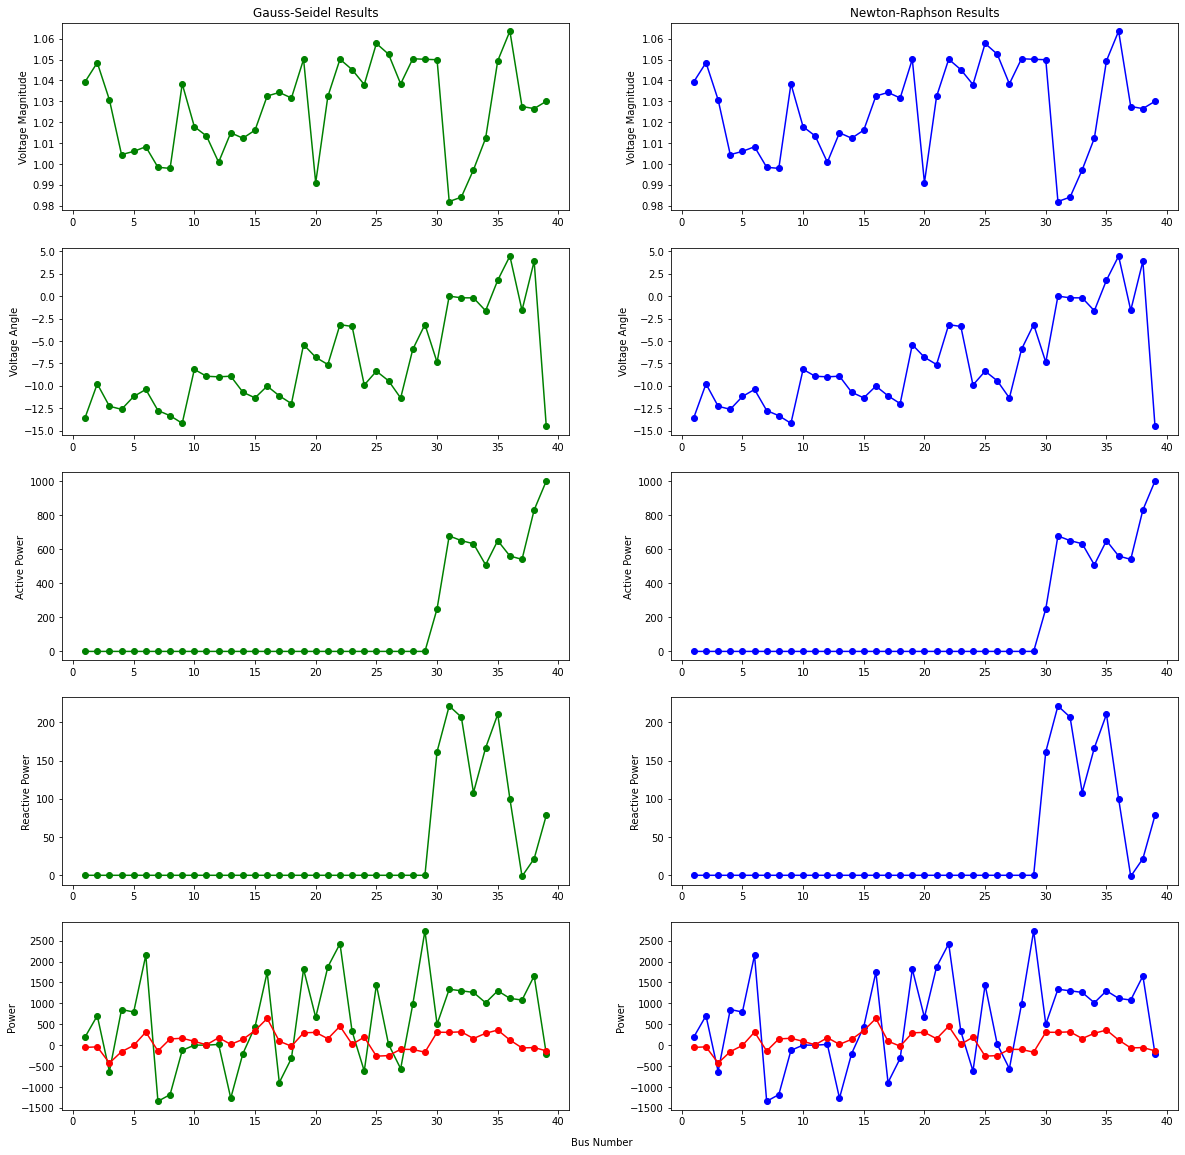

In [16]:
x = np.arange(1, 40, 1)
fig, axs = plt.subplots(5, 2, figsize = (20, 20))
fig.text(x = 0.5, y = 0.1, s ='Bus Number', ha = 'center')

#1) Voltage Magnitude
ax = axs[0,0]
ax.set_title('Gauss-Seidel Results')
ax.plot(x, v_mag_gs, 'og-')
ax.set(ylabel = 'Voltage Magnitude')

ax = axs[0, 1]
ax.set_title('Newton-Raphson Results')
ax.plot(x, v_mag_nr, 'ob-')
ax.set(ylabel = 'Voltage Magnitude')

#2) Voltage Angles

ax = axs[1,0]
ax.plot(x, v_ang_gs, 'og-')
ax.set(ylabel = 'Voltage Angle')
           
ax = axs[1,1]
ax.plot(x, v_ang_gs, 'ob-')
ax.set(ylabel = 'Voltage Angle')

#3) Active Power Generation

ax = axs[2, 0]
ax.plot(x, pg_genbus, 'og-')
ax.set(ylabel = 'Active Power')
           
ax = axs[2, 1]
ax.plot(x, pg_genbus_nr, 'ob-')
ax.set(ylabel = 'Active Power')

#4) Reactive Power Generation

ax = axs[3, 0]
ax.plot(x, qg_genbus, 'og-')
ax.set(ylabel = 'Reactive Power')
           
ax = axs[3, 1]
ax.plot(x, qg_genbus_nr, 'ob-')
ax.set(ylabel = 'Reactive Power')

#5) Power Losses

ax = axs[4, 0]
ax.plot(x, p_loss_gs, 'og-', x, q_loss_gs, 'or-')
ax.set(ylabel = 'Power')
           
ax = axs[4, 1]
ax.plot(x, p_loss_nr, 'ob-', x, q_loss_nr, 'or-')
ax.set(ylabel = 'Power')


plt.show()

### Compare the iterations

In [23]:
if it_nr < it_gs:
    print("Newton-Raphson is better and takes", it_nr, "iteration(s)")
elif it_nr > it_gs:
    print("Gauss-Seidel is better and takes", it_gs, "iteration(s)")
else:
    print("They are even")

Newton-Raphson is better and takes 1 iteration(s)
